## Import necessary libraries

In [38]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

## Converts input string to mathematical function

In [21]:
def create_function_from_string():
    # Safe list of functions and constants
    allowed_functions = {
        'sin': np.sin,
        'cos': np.cos,
        'tan': np.tan,
        'log': np.log,
        'exp': np.exp,
        'sqrt': np.sqrt,
        'power': np.power,
        'pi': np.pi,
        'e': np.e
    }
    
    # Prompt the user to input an equation
    equation = input("Enter your equation f(x) = 0 in terms of x. Example: 'x**2 - 4*x + 4': ")
    
    # Cleaning and checking the input
    equation = equation.replace('^', '**')  # Replace ^ with ** for power operation
    
    # Defining a function that evaluates the input equation
    def fx_equal_0(x):
        try:
            # Evaluating the equation safely
            return eval(equation, {"__builtins__": None}, {**allowed_functions, 'x': x})
        except Exception as e:
            print(f"Error in evaluating the equation: {e}")
            return None
    
    return fx_equal_0

## Implementation of Newton Raphson Method to return root, the associated error and the number of iterations

In [22]:
def derivative(f, x):
    h = 1e-6  # Small step size
    return (f(x + h) - f(x)) / h

In [23]:
def newton_raphson(f, df, x0, tol=1e-8, max_iter=1000):
    x = x0
    steps = [(x, f(x))]
    errors = []
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x, errors, steps
        if dfx == 0:
            raise ValueError("Derivative is zero. No solution found.")
        x_new = x - fx / dfx
        steps.append((x_new, f(x_new)))
        errors.append(abs(x_new - x))
        x = x_new
    raise ValueError("Maximum iterations exceeded. No solution found.")

## Implementation of the Secant Method to return the root

In [24]:
def secant_method(f, x0, x1, tol=1e-8, max_iter=1000):
    steps = [(x0, f(x0)), (x1, f(x1))]
    errors = []
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1, errors, steps
        if (fx1 - fx0) == 0:
            raise ValueError("Division by zero. No solution found.")
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        steps.append((x_new, f(x_new)))
        errors.append(abs(x_new - x1))
        x0, x1 = x1, x_new
    raise ValueError("Maximum iterations exceeded. No solution found.")

## Implementation of the Bisection Method to return the root

In [25]:
def bisection_method(f, a, b, tol=1e-8, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not have opposite signs at the interval endpoints.")
    steps = []
    errors = []
    for i in range(max_iter):
        c = (a + b) / 2
        steps.append((c, f(c)))
        if abs(f(c)) < tol:
            return c, errors, steps
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        errors.append(abs(b - a))
    raise ValueError("Maximum iterations exceeded. No solution found.")

## Implementation of the False Position Method to return the root

In [26]:
def false_position_method(f, a, b, tol=1e-8, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not have opposite signs at the interval endpoints.")
    steps = []
    errors = []
    for i in range(max_iter):
        c = a - f(a) * (b - a) / (f(b) - f(a))
        steps.append((c, f(c)))
        if abs(f(c)) < tol:
            return c, errors, steps
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        errors.append(abs(b - a))
    raise ValueError("Maximum iterations exceeded. No solution found.")

## Plots the function and root

In [27]:
def plot_function_and_root(f, root):
    x_vals = np.linspace(root - 1, root + 1, 400)
    y_vals = f(x_vals)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(root, color='red', linestyle='--', label=f'Root at x = {root:.6f}')
    plt.title('Graph of the function and its Newton-Raphson Root')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Animates the Newton Raphson Method

In [28]:
def animate_newton_raphson(f, steps, root):
    fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size for better visibility
    x_vals = np.linspace(root-1, root+1, 400)
    y_vals = f(x_vals)
    
    ax.plot(x_vals, y_vals, label='f(x)')
    ax.axhline(0, color='black', linewidth=0.5)
    
    line, = ax.plot([], [], 'ro-', label='Newton-Raphson steps')
    point, = ax.plot([], [], 'bo', label='Current point')
    
    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point
    
    def update(frame):
        x_data, y_data = zip(*steps[:frame+1])
        line.set_data(x_data, y_data)
        point.set_data(x_data[-1], y_data[-1])
        return line, point
    
    ani = FuncAnimation(fig, update, frames=len(steps), init_func=init, blit=True, repeat=False)
    
    plt.title('Newton-Raphson Method Steps')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    
    # Save the animation as a video file
    writer = FFMpegWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)  # Adjust fps for slower iteration
    ani.save("newton_raphson_animation.mp4", writer=writer)
    plt.show()

## Animate Secant Method

In [29]:
def animate_secant_method(f, steps, root):
    fig, ax = plt.subplots(figsize=(12, 8))
    x_vals = np.linspace(min(steps)[0]-1, max(steps)[0]+1, 400)
    y_vals = f(x_vals)
    
    ax.plot(x_vals, y_vals, label='f(x)')
    ax.axhline(0, color='black', linewidth=0.5)
    
    line, = ax.plot([], [], 'ro-', label='Secant steps')
    point, = ax.plot([], [], 'bo', label='Current point')
    
    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point
    
    def update(frame):
        x_data, y_data = zip(*steps[:frame+1])
        line.set_data(x_data, y_data)
        point.set_data(x_data[-1], y_data[-1])
        return line, point
    
    ani = FuncAnimation(fig, update, frames=len(steps), init_func=init, blit=True, repeat=False)
    
    plt.title('Secant Method Steps')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    
    writer = FFMpegWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    ani.save("secant_method_animation.mp4", writer=writer)
    plt.show()


## Animate Bisection Method

In [30]:
def animate_bisection_method(f, steps, root):
    fig, ax = plt.subplots(figsize=(12, 8))
    x_vals = np.linspace(min(steps, key=lambda x: x[0])[0]-1, max(steps, key=lambda x: x[0])[0]+1, 400)
    y_vals = f(x_vals)
    
    ax.plot(x_vals, y_vals, label='f(x)')
    ax.axhline(0, color='black', linewidth=0.5)
    
    line, = ax.plot([], [], 'ro-', label='Bisection steps')
    point, = ax.plot([], [], 'bo', label='Current point')
    
    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point
    
    def update(frame):
        x_data, y_data = zip(*steps[:frame+1])
        line.set_data(x_data, y_data)
        point.set_data(x_data[-1], y_data[-1])
        return line, point
    
    ani = FuncAnimation(fig, update, frames=len(steps), init_func=init, blit=True, repeat=False)
    
    plt.title('Bisection Method Steps')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    
    writer = FFMpegWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    ani.save("bisection_method_animation.mp4", writer=writer)
    plt.show()


## Animate False Position Method

In [31]:
def animate_false_position_method(f, steps, root):
    fig, ax = plt.subplots(figsize=(12, 8))
    x_vals = np.linspace(min(steps, key=lambda x: x[0])[0]-1, max(steps, key=lambda x: x[0])[0]+1, 400)
    y_vals = f(x_vals)
    
    ax.plot(x_vals, y_vals, label='f(x)')
    ax.axhline(0, color='black', linewidth=0.5)
    
    line, = ax.plot([], [], 'ro-', label='False Position steps')
    point, = ax.plot([], [], 'bo', label='Current point')
    
    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point
    
    def update(frame):
        x_data, y_data = zip(*steps[:frame+1])
        line.set_data(x_data, y_data)
        point.set_data(x_data[-1], y_data[-1])
        return line, point
    
    ani = FuncAnimation(fig, update, frames=len(steps), init_func=init, blit=True, repeat=False)
    
    plt.title('False Position Method Steps')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    
    writer = FFMpegWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    ani.save("false_position_method_animation.mp4", writer=writer)
    plt.show()


## Main calling function

In [32]:
def run_newton_raphson(f):
    x0 = float(input("Enter the initial guess x0: "))
    root, errors, steps = newton_raphson(f, lambda x: derivative(f, x), x0)
    print("Method used: Newton-Raphson Method")
    print(f"Root found: {root}")
    plot_function_and_root(f, root)
    animate_newton_raphson(f, steps, root)


In [33]:
def run_secant_method(f):
    x0 = float(input("Enter the first initial guess x0: "))
    x1 = float(input("Enter the second initial guess x1: "))
    root, errors, steps = secant_method(f, x0, x1)
    print("Method used: Secant Method")
    print(f"Root found: {root}")
    plot_function_and_root(f, root)
    animate_secant_method(f, steps, root)


In [34]:
def run_bisection_method(f):
    a = float(input("Enter the lower bound of the interval a: "))
    b = float(input("Enter the upper bound of the interval b: "))
    root, errors, steps = bisection_method(f, a, b)
    print("Method used: Bisection Method")
    print(f"Root found: {root}")
    plot_function_and_root(f, root)
    animate_bisection_method(f, steps, root)


In [35]:
def run_false_position_method(f):
    a = float(input("Enter the lower bound of the interval a: "))
    b = float(input("Enter the upper bound of the interval b: "))
    root, errors, steps = false_position_method(f, a, b)
    print("Method used: False Position Method")
    print(f"Root found: {root}")
    plot_function_and_root(f, root)
    animate_false_position_method(f, steps, root)


Choose the root-finding method:
1. Newton-Raphson Method
2. Secant Method
3. Bisection Method
4. False Position Method
Method used: Secant Method
Root found: 1.0


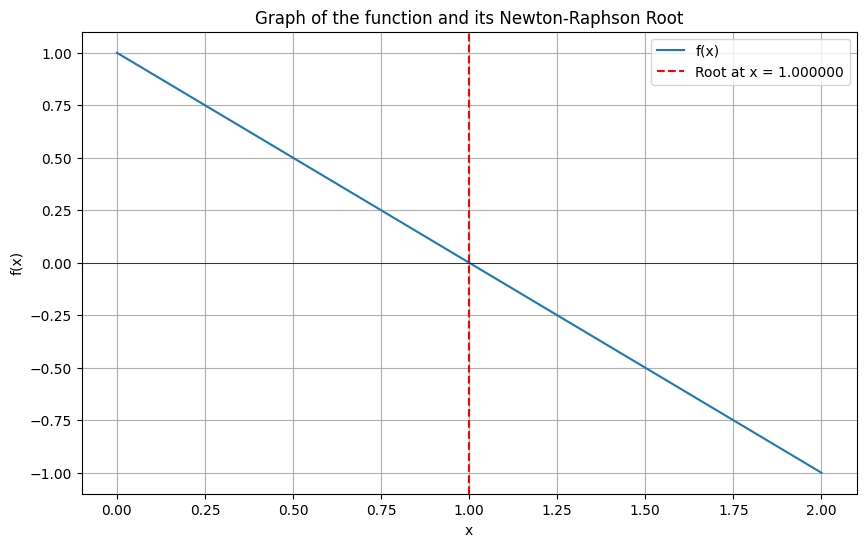

/var/folders/cc/87njkkv159l3hskj13tfcpxr0000gn/T/ipykernel_1245/1110171873.py:20: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_data[-1], y_data[-1])


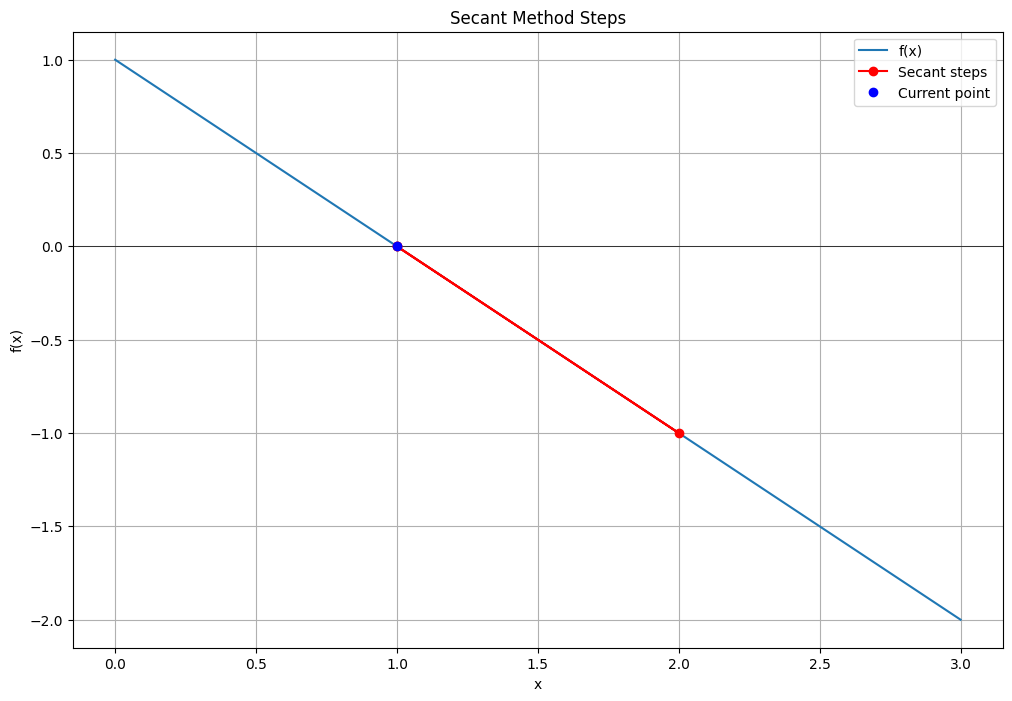

In [36]:
def main():
    # Get the function from the user
    f = create_function_from_string()
    
    # Choose the root-finding method
    print("Choose the root-finding method:")
    print("1. Newton-Raphson Method")
    print("2. Secant Method")
    print("3. Bisection Method")
    print("4. False Position Method")
    method = int(input("Enter the number corresponding to the method: "))
    
    # Call the appropriate function based on the selected method
    if method == 1:
        run_newton_raphson(f)
    elif method == 2:
        run_secant_method(f)
    elif method == 3:
        run_bisection_method(f)
    elif method == 4:
        run_false_position_method(f)
    else:
        print("Invalid method chosen.")
        return

if __name__ == "__main__":
    main()
